## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap XMAS scan (aggressive)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_xmas_scan_aggressive'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times

0    0.069863
1    0.059231
2    0.057399
3    0.056766
4    0.069446
5    0.051468
6    0.063666
7    0.073346
8    0.060804
9    0.052816
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    0.061481
dtype: float64

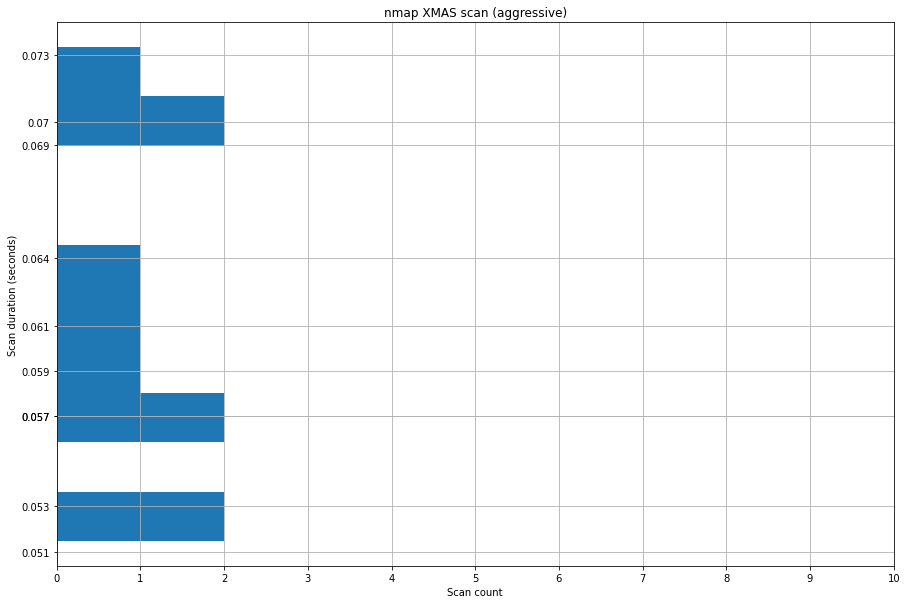

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.061481
std,0.007446
min,0.051468
25%,0.056924
50%,0.060018
75%,0.068001
max,0.073346


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1229.6109199523926



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 57278 8080
2 57278 1720
3 57278 110
4 57278 111
5 57278 995
6 57278 5900
7 57278 80
8 57278 135
9 57278 256
10 57278 993
11 57278 53
12 57278 1723
13 57278 443
14 57278 25
15 57278 445
16 57278 3389
17 57278 113
18 57278 199
19 57278 8888
20 57278 21
21 57278 143
22 57278 23
23 57278 22
24 57278 3306
25 57278 587
26 57278 139
27 57278 554
28 57278 1025
29 57278 49400
30 57278 1090
31 57278 2105
32 57278 4224
33 57278 9929
34 57278 8899
35 57278 1971
36 57278 4567
37 57278 900
38 57278 416
39 57278 3013
40 57278 10025
41 57278 9050
42 57278 1301
43 57278 32785
44 57278 1117
45 57278 8333
46 57278 1594
47 57278 2399
48 57278 1094
49 57278 2401
50 57278 1102
51 57278 2920
52 57278 57294
53 57278 8021
54 57278 7019
55 57278 8701
56 57278 3546
57 57278 2106
58 57278 3390
59 57278 648
60 57278 32772
61 57278 617
62 57278 1124
63 57278 56738
64 57278 50000
65 57278 2601
66 57278 1761
67 57278 5200
68 57278 15742
69 57278 7777
70 57278 1037
71 57278 625
72 57278 7103
73 57278 3221
74 57278 9

620 57278 8400
621 57278 82
622 57278 2068
623 57278 5678
624 57278 700
625 57278 14238
626 57278 9040
627 57278 1011
628 57278 3369
629 57278 1100
630 57278 5877
631 57278 5950
632 57278 2030
633 57278 3003
634 57278 1099
635 57278 280
636 57278 2161
637 57278 1875
638 57278 19780
639 57278 1063
640 57278 61900
641 57278 3918
642 57278 1166
643 57278 1864
644 57278 5802
645 57278 7002
646 57278 3517
647 57278 1091
648 57278 2035
649 57278 2065
650 57278 1287
651 57278 2119
652 57278 1077
653 57278 1501
654 57278 24800
655 57278 5544
656 57278 3690
657 57278 6346
658 57278 3551
659 57278 1002
660 57278 7007
661 57278 6106
662 57278 211
663 57278 1032
664 57278 4045
665 57278 9207
666 57278 6901
667 57278 49999
668 57278 64680
669 57278 44443
670 57278 1087
671 57278 27355
672 57278 765
673 57278 30
674 57278 3869
675 57278 1183
676 57278 3268
677 57278 9878
678 57278 19842
679 57278 3404
680 57278 9001
681 57278 61532
682 57278 55055
683 57278 3168
684 57278 1131
685 57278 5221
686 572

288 45756 1112
289 45756 4003
290 45756 1580
291 45756 1039
292 45756 1301
293 45756 1030
294 45756 50636
295 45756 4125
296 45756 3007
297 45756 3551
298 45756 5679
299 45756 8011
300 45756 9998
301 45756 5904
302 45756 8300
303 45756 2800
304 45756 27715
305 45756 1046
306 45756 3869
307 45756 65389
308 45756 9001
309 45756 6002
310 45756 50003
311 45756 2702
312 45756 5963
313 45756 8402
314 45756 3827
315 45756 6839
316 45756 8291
317 45756 514
318 45756 6000
319 45756 31337
320 45756 4045
321 45756 49167
322 45756 1097
323 45756 8800
324 45756 9415
325 45756 5910
326 45756 800
327 45756 5633
328 45756 163
329 45756 4343
330 45756 1062
331 45756 6692
332 45756 1075
333 45756 5925
334 45756 1000
335 45756 3546
336 45756 3071
337 45756 10243
338 45756 8090
339 45756 2035
340 45756 3800
341 45756 146
342 45756 2260
343 45756 1043
344 45756 6789
345 45756 1839
346 45756 63331
347 45756 1069
348 45756 8088
349 45756 389
350 45756 2045
351 45756 1113
352 45756 1007
353 45756 1070
354 457

954 45756 1054
955 45756 2968
956 45756 3390
957 45756 1067
958 45756 3260
959 45756 264
960 45756 7676
961 45756 55056
962 45756 60443
963 45756 1104
964 45756 1100
965 45756 1041
966 45756 12265
967 45756 648
968 45756 1145
969 45756 1718
970 45756 2020
971 45756 3001
972 45756 2602
973 45756 2399
974 45756 1088
975 45756 1998
976 45756 61532
977 45756 5952
978 45756 4129
979 45756 9878
980 45756 5101
981 45756 7435
982 45756 13
983 45756 83
984 45756 3077
985 45756 3889
986 45756 58080
987 45756 777
988 45756 5907
989 45756 2105
990 45756 100
991 45756 10024
992 45756 1047
993 45756 5862
994 45756 14000
995 45756 20222
996 45756 6646
997 45756 3372
998 45756 3211
999 45756 3809
1000 45756 2005
1 33837 113
2 33837 8080
3 33837 139
4 33837 80
5 33837 22
6 33837 3389
7 33837 256
8 33837 1025
9 33837 143
10 33837 993
11 33837 111
12 33837 587
13 33837 135
14 33837 1723
15 33837 23
16 33837 1720
17 33837 443
18 33837 3306
19 33837 5900
20 33837 445
21 33837 995
22 33837 110
23 33837 199


621 33837 1271
622 33837 5987
623 33837 666
624 33837 5405
625 33837 5801
626 33837 3766
627 33837 9090
628 33837 55600
629 33837 1094
630 33837 9001
631 33837 1079
632 33837 513
633 33837 912
634 33837 7512
635 33837 3013
636 33837 21571
637 33837 9917
638 33837 1131
639 33837 27356
640 33837 12000
641 33837 5904
642 33837 4126
643 33837 9500
644 33837 49160
645 33837 6001
646 33837 1700
647 33837 6669
648 33837 8011
649 33837 1783
650 33837 8007
651 33837 7800
652 33837 49400
653 33837 301
654 33837 1533
655 33837 4449
656 33837 3260
657 33837 18101
658 33837 1900
659 33837 2160
660 33837 5030
661 33837 4006
662 33837 3300
663 33837 52822
664 33837 5214
665 33837 55555
666 33837 6100
667 33837 41511
668 33837 5000
669 33837 7103
670 33837 667
671 33837 5050
672 33837 9878
673 33837 1974
674 33837 49161
675 33837 5950
676 33837 1201
677 33837 17877
678 33837 9050
679 33837 50003
680 33837 497
681 33837 10025
682 33837 30718
683 33837 5190
684 33837 800
685 33837 3814
686 33837 1914
68

287 51309 625
288 51309 51493
289 51309 1024
290 51309 4321
291 51309 541
292 51309 1077
293 51309 1947
294 51309 9
295 51309 49176
296 51309 5925
297 51309 8083
298 51309 1049
299 51309 5950
300 51309 2492
301 51309 9943
302 51309 1034
303 51309 6839
304 51309 888
305 51309 903
306 51309 3268
307 51309 2099
308 51309 3737
309 51309 24444
310 51309 32776
311 51309 1100
312 51309 1021
313 51309 2301
314 51309 1080
315 51309 3889
316 51309 1096
317 51309 1102
318 51309 4002
319 51309 2160
320 51309 2381
321 51309 901
322 51309 3390
323 51309 7911
324 51309 1043
325 51309 3017
326 51309 8011
327 51309 55555
328 51309 3007
329 51309 1217
330 51309 2725
331 51309 12345
332 51309 5100
333 51309 7920
334 51309 1052
335 51309 1041
336 51309 648
337 51309 5988
338 51309 3300
339 51309 33354
340 51309 5998
341 51309 5357
342 51309 7777
343 51309 1081
344 51309 4242
345 51309 8081
346 51309 5050
347 51309 6100
348 51309 705
349 51309 5810
350 51309 1417
351 51309 5225
352 51309 10001
353 51309 50

953 51309 22939
954 51309 5002
955 51309 10004
956 51309 2323
957 51309 911
958 51309 1187
959 51309 2020
960 51309 48080
961 51309 79
962 51309 1149
963 51309 11110
964 51309 3690
965 51309 2009
966 51309 6005
967 51309 783
968 51309 8402
969 51309 9050
970 51309 1071
971 51309 16016
972 51309 3211
973 51309 9594
974 51309 34572
975 51309 1122
976 51309 56738
977 51309 7070
978 51309 19
979 51309 163
980 51309 1234
981 51309 2382
982 51309 15003
983 51309 5060
984 51309 50300
985 51309 5907
986 51309 6667
987 51309 1141
988 51309 4998
989 51309 4848
990 51309 2200
991 51309 1042
992 51309 40193
993 51309 5054
994 51309 2393
995 51309 212
996 51309 8002
997 51309 1029
998 51309 5555
999 51309 56737
1000 51309 389
1 44350 8080
2 44350 443
3 44350 135
4 44350 21
5 44350 1720
6 44350 25
7 44350 1723
8 44350 53
9 44350 554
10 44350 995
11 44350 111
12 44350 22
13 44350 80
14 44350 1025
15 44350 3306
16 44350 110
17 44350 8888
18 44350 143
19 44350 993
20 44350 23
21 44350 256
22 44350 3389

620 44350 1199
621 44350 33899
622 44350 2010
623 44350 2103
624 44350 7007
625 44350 49165
626 44350 2200
627 44350 3889
628 44350 14238
629 44350 8181
630 44350 912
631 44350 1021
632 44350 5414
633 44350 2033
634 44350 898
635 44350 83
636 44350 4444
637 44350 1137
638 44350 9003
639 44350 13722
640 44350 593
641 44350 10215
642 44350 5357
643 44350 27352
644 44350 2065
645 44350 512
646 44350 9091
647 44350 16992
648 44350 6789
649 44350 52822
650 44350 5002
651 44350 306
652 44350 3971
653 44350 43
654 44350 64623
655 44350 8873
656 44350 19801
657 44350 5101
658 44350 5901
659 44350 1045
660 44350 1072
661 44350 5061
662 44350 4550
663 44350 1057
664 44350 9050
665 44350 2121
666 44350 50001
667 44350 2393
668 44350 1247
669 44350 3905
670 44350 3369
671 44350 8200
672 44350 2399
673 44350 5190
674 44350 2875
675 44350 32772
676 44350 1076
677 44350 1036
678 44350 7000
679 44350 55055
680 44350 631
681 44350 6000
682 44350 9595
683 44350 1301
684 44350 1163
685 44350 2161
686 443

286 64075 1086
287 64075 465
288 64075 1090
289 64075 9594
290 64075 259
291 64075 10626
292 64075 593
293 64075 9103
294 64075 1183
295 64075 7921
296 64075 1666
297 64075 32780
298 64075 2809
299 64075 6969
300 64075 4848
301 64075 1185
302 64075 13
303 64075 458
304 64075 1044
305 64075 18988
306 64075 3945
307 64075 13456
308 64075 6667
309 64075 1999
310 64075 65000
311 64075 8400
312 64075 9009
313 64075 20828
314 64075 1311
315 64075 5922
316 64075 32769
317 64075 10004
318 64075 2710
319 64075 1132
320 64075 1091
321 64075 6007
322 64075 5850
323 64075 7496
324 64075 2191
325 64075 1972
326 64075 8192
327 64075 1201
328 64075 1300
329 64075 999
330 64075 6129
331 64075 5811
332 64075 5000
333 64075 2100
334 64075 2998
335 64075 2103
336 64075 49
337 64075 4001
338 64075 1688
339 64075 1839
340 64075 1000
341 64075 24800
342 64075 1594
343 64075 5987
344 64075 3869
345 64075 1032
346 64075 10778
347 64075 18040
348 64075 1721
349 64075 119
350 64075 301
351 64075 3011
352 64075 

952 64075 1026
953 64075 5225
954 64075 1914
955 64075 17988
956 64075 50006
957 64075 32770
958 64075 2121
959 64075 2717
960 64075 33354
961 64075 631
962 64075 9944
963 64075 5901
964 64075 1213
965 64075 5989
966 64075 2200
967 64075 1045
968 64075 4321
969 64075 8402
970 64075 19
971 64075 4449
972 64075 5061
973 64075 5962
974 64075 50300
975 64075 19101
976 64075 8007
977 64075 2920
978 64075 4445
979 64075 13722
980 64075 20221
981 64075 5100
982 64075 1094
983 64075 7999
984 64075 11967
985 64075 42510
986 64075 1066
987 64075 30
988 64075 2040
989 64075 5003
990 64075 4998
991 64075 9876
992 64075 2393
993 64075 6839
994 64075 9290
995 64075 1055
996 64075 1352
997 64075 5904
998 64075 10010
999 64075 49153
1000 64075 15660
1 43106 25
2 43106 5900
3 43106 111
4 43106 554
5 43106 143
6 43106 3306
7 43106 21
8 43106 113
9 43106 1025
10 43106 1720
11 43106 23
12 43106 139
13 43106 199
14 43106 587
15 43106 80
16 43106 8080
17 43106 3389
18 43106 22
19 43106 256
20 43106 445
21 4

119 61259 4004
120 61259 340
121 61259 19842
122 61259 1064
123 61259 12000
124 61259 8600
125 61259 8100
126 61259 2288
127 61259 700
128 61259 1999
129 61259 61900
130 61259 7200
131 61259 1021
132 61259 49159
133 61259 179
134 61259 5859
135 61259 4900
136 61259 7002
137 61259 5922
138 61259 2638
139 61259 6112
140 61259 3827
141 61259 1151
142 61259 4
143 61259 625
144 61259 1082
145 61259 3826
146 61259 1217
147 61259 6666
148 61259 10001
149 61259 2100
150 61259 10025
151 61259 8008
152 61259 9968
153 61259 40911
154 61259 3007
155 61259 1166
156 61259 1186
157 61259 1028
158 61259 541
159 61259 901
160 61259 1310
161 61259 1039
162 61259 1132
163 61259 5666
164 61259 1600
165 61259 2144
166 61259 8873
167 61259 4899
168 61259 6123
169 61259 10215
170 61259 32779
171 61259 23502
172 61259 6003
173 61259 5800
174 61259 1084
175 61259 6901
176 61259 311
177 61259 2043
178 61259 3546
179 61259 89
180 61259 259
181 61259 20000
182 61259 2170
183 61259 1272
184 61259 5850
185 61259 27

785 61259 3052
786 61259 1087
787 61259 1042
788 61259 1947
789 61259 301
790 61259 19780
791 61259 6
792 61259 55600
793 61259 8400
794 61259 1094
795 61259 7201
796 61259 2111
797 61259 6667
798 61259 2065
799 61259 6502
800 61259 6000
801 61259 14442
802 61259 524
803 61259 7435
804 61259 37
805 61259 646
806 61259 3703
807 61259 106
808 61259 5907
809 61259 1455
810 61259 15002
811 61259 14441
812 61259 45100
813 61259 2394
814 61259 1057
815 61259 545
816 61259 5904
817 61259 32770
818 61259 8333
819 61259 6567
820 61259 1086
821 61259 1141
822 61259 2191
823 61259 1352
824 61259 4445
825 61259 81
826 61259 6668
827 61259 3071
828 61259 4126
829 61259 4006
830 61259 3493
831 61259 14000
832 61259 1071
833 61259 3369
834 61259 6565
835 61259 1301
836 61259 902
837 61259 70
838 61259 1111
839 61259 1063
840 61259 20222
841 61259 13
842 61259 691
843 61259 100
844 61259 6543
845 61259 3077
846 61259 9001
847 61259 5440
848 61259 1187
849 61259 1074
850 61259 49154
851 61259 254
852 6

452 39822 2998
453 39822 2135
454 39822 1055
455 39822 2170
456 39822 1187
457 39822 5500
458 39822 3690
459 39822 8099
460 39822 61900
461 39822 4446
462 39822 16080
463 39822 1984
464 39822 4126
465 39822 32778
466 39822 1247
467 39822 9593
468 39822 6502
469 39822 9418
470 39822 8088
471 39822 1090
472 39822 2394
473 39822 1037
474 39822 1700
475 39822 667
476 39822 70
477 39822 7999
478 39822 5962
479 39822 44501
480 39822 2020
481 39822 50002
482 39822 2040
483 39822 7625
484 39822 417
485 39822 3011
486 39822 1057
487 39822 5906
488 39822 1107
489 39822 1106
490 39822 8001
491 39822 10025
492 39822 2638
493 39822 5850
494 39822 631
495 39822 9917
496 39822 6646
497 39822 3986
498 39822 2702
499 39822 32770
500 39822 1031
501 39822 5214
502 39822 6004
503 39822 8290
504 39822 4006
505 39822 2008
506 39822 3945
507 39822 726
508 39822 873
509 39822 3168
510 39822 1028
511 39822 5054
512 39822 179
513 39822 9998
514 39822 666
515 39822 4242
516 39822 2007
517 39822 50500
518 39822 8

118 52852 8400
119 52852 4900
120 52852 3324
121 52852 49159
122 52852 7938
123 52852 3283
124 52852 2607
125 52852 6668
126 52852 2522
127 52852 15003
128 52852 5988
129 52852 6003
130 52852 1106
131 52852 8093
132 52852 16016
133 52852 5000
134 52852 1352
135 52852 749
136 52852 1119
137 52852 1154
138 52852 2001
139 52852 42
140 52852 2000
141 52852 1433
142 52852 1049
143 52852 32779
144 52852 3814
145 52852 2910
146 52852 1095
147 52852 5002
148 52852 2200
149 52852 2006
150 52852 5877
151 52852 1065
152 52852 26
153 52852 3168
154 52852 8180
155 52852 8008
156 52852 1104
157 52852 9503
158 52852 1840
159 52852 3013
160 52852 999
161 52852 8290
162 52852 2010
163 52852 1096
164 52852 1
165 52852 1947
166 52852 6689
167 52852 50800
168 52852 3998
169 52852 4550
170 52852 27000
171 52852 4002
172 52852 19315
173 52852 912
174 52852 992
175 52852 1100
176 52852 1658
177 52852 1277
178 52852 7103
179 52852 5431
180 52852 1461
181 52852 10616
182 52852 8009
183 52852 5405
184 52852 368

785 52852 7800
786 52852 705
787 52852 9009
788 52852 687
789 52852 1081
790 52852 1060
791 52852 720
792 52852 2366
793 52852 14238
794 52852 3889
795 52852 32769
796 52852 81
797 52852 5999
798 52852 1687
799 52852 1580
800 52852 32778
801 52852 16000
802 52852 1098
803 52852 65129
804 52852 6001
805 52852 4443
806 52852 15004
807 52852 2725
808 52852 16018
809 52852 2105
810 52852 5825
811 52852 617
812 52852 2048
813 52852 2100
814 52852 481
815 52852 2381
816 52852 911
817 52852 5962
818 52852 32784
819 52852 7741
820 52852 1783
821 52852 8088
822 52852 65389
823 52852 1089
824 52852 6106
825 52852 8649
826 52852 6346
827 52852 1935
828 52852 5811
829 52852 5269
830 52852 7496
831 52852 1192
832 52852 55600
833 52852 10215
834 52852 18101
835 52852 24
836 52852 4126
837 52852 5631
838 52852 34572
839 52852 4899
840 52852 32781
841 52852 593
842 52852 301
843 52852 515
844 52852 5414
845 52852 50636
846 52852 18040
847 52852 26214
848 52852 1077
849 52852 8010
850 52852 3476
851 52

In [39]:
orders_port

,scannr,sport,dport
0,1,57278,8080
1,2,57278,1720
2,3,57278,110
3,4,57278,111
4,5,57278,995
...,...,...,...
9995,996,52852,1296
9996,997,52852,3000
9997,998,52852,631
9998,999,52852,10004


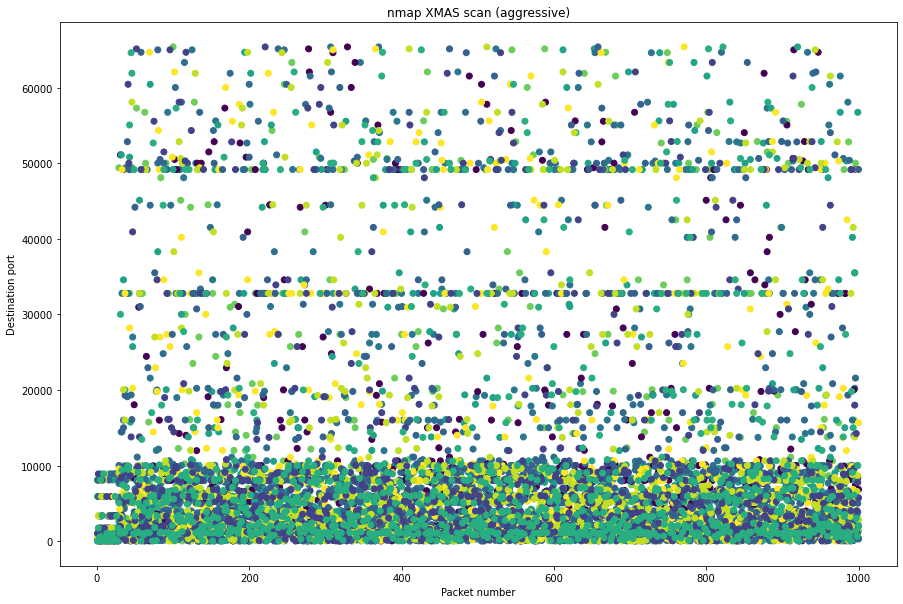

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

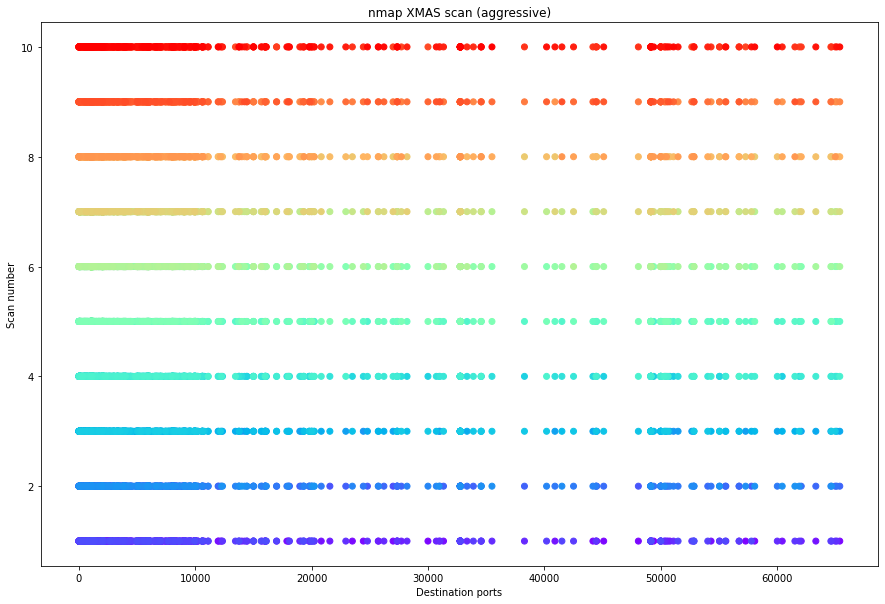

In [19]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

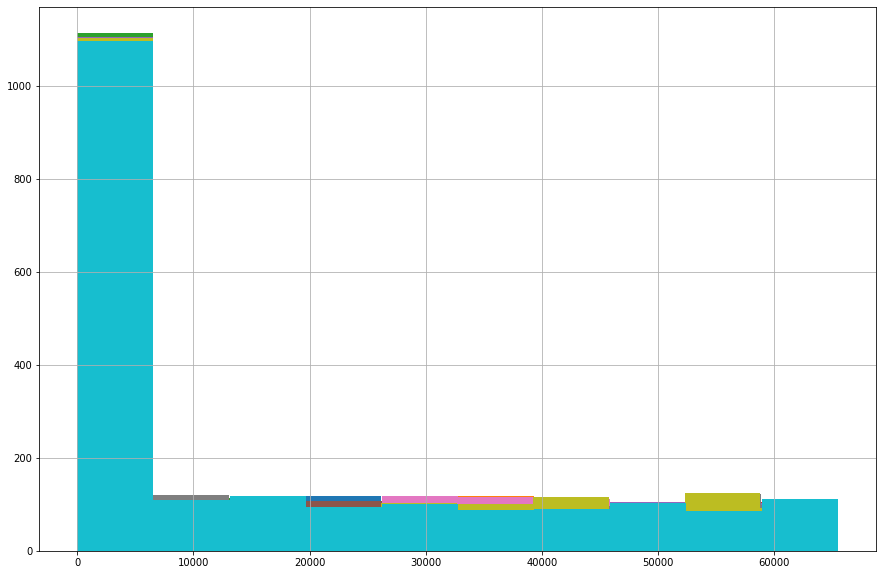

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

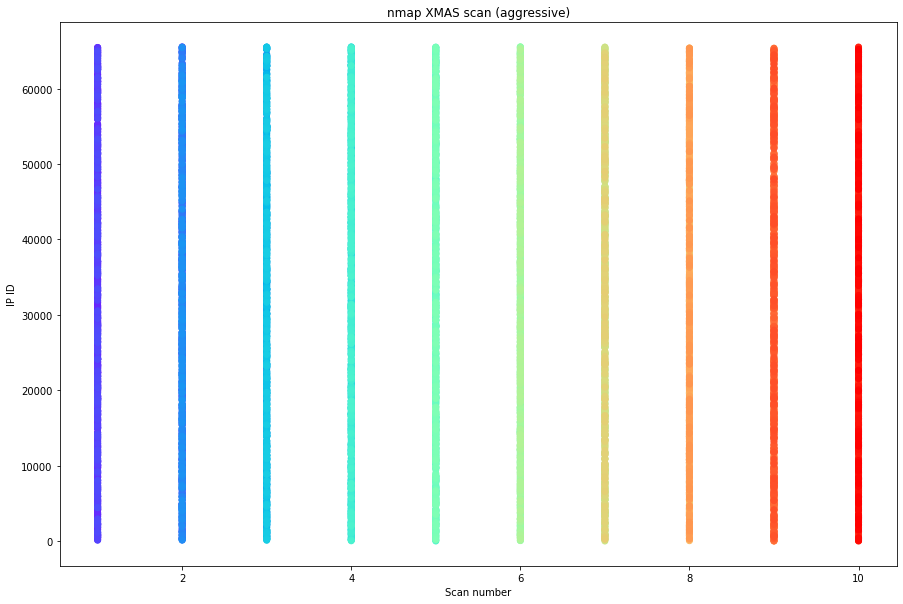

In [25]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()


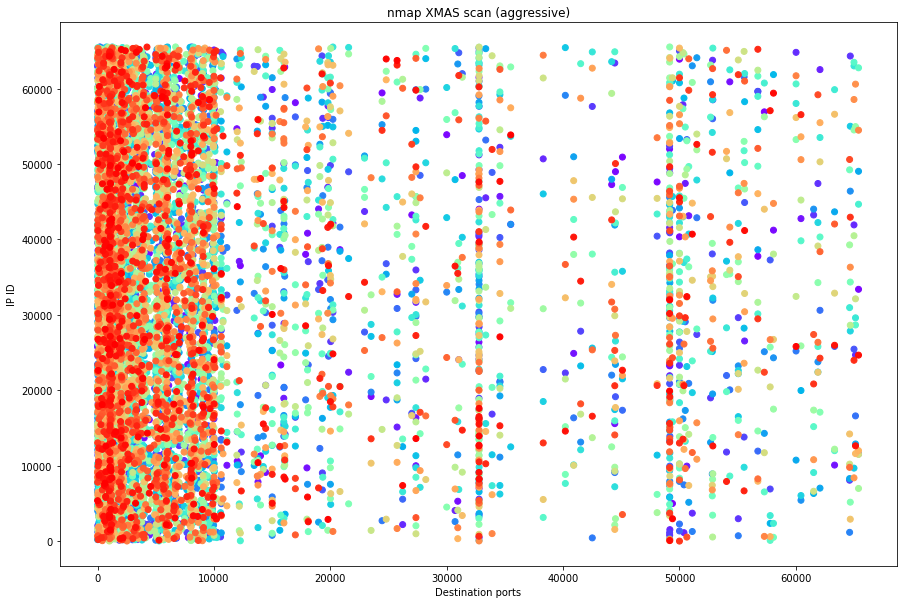

In [26]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

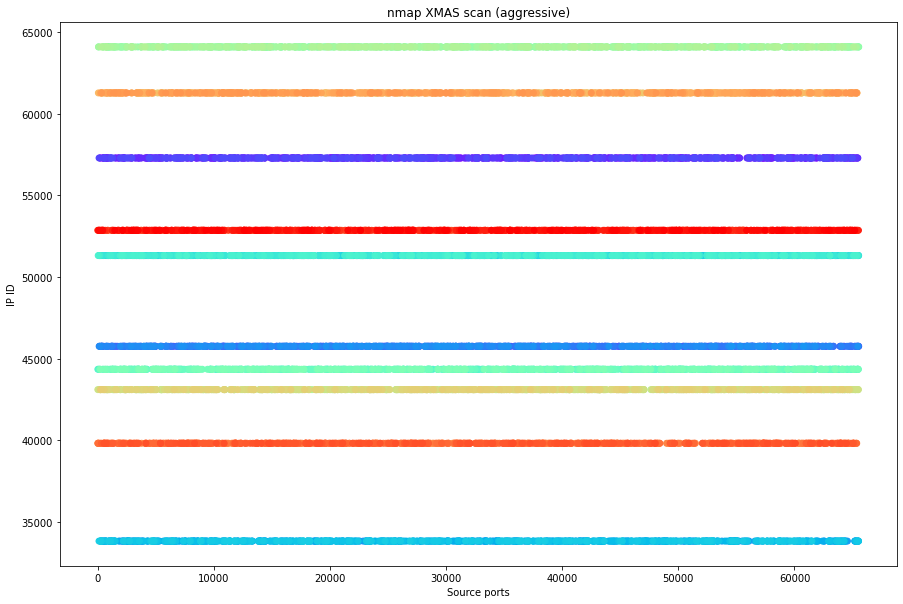

In [37]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
-----
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Wind

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 2135067198
Sequence number: 213

Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
Sequence number: 894858400
S

Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
Sequence number: 465361794
S

Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 267

Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 2677234345
Sequence number: 267

Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 3247172981
Sequence number: 324

Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 1336672482
Sequence number: 133

Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 1948530929
Sequence number: 194

Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence number: 26260933
Sequence num

Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
Sequence number: 201659055
S

Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence num

Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence number: 96649379
Sequence num

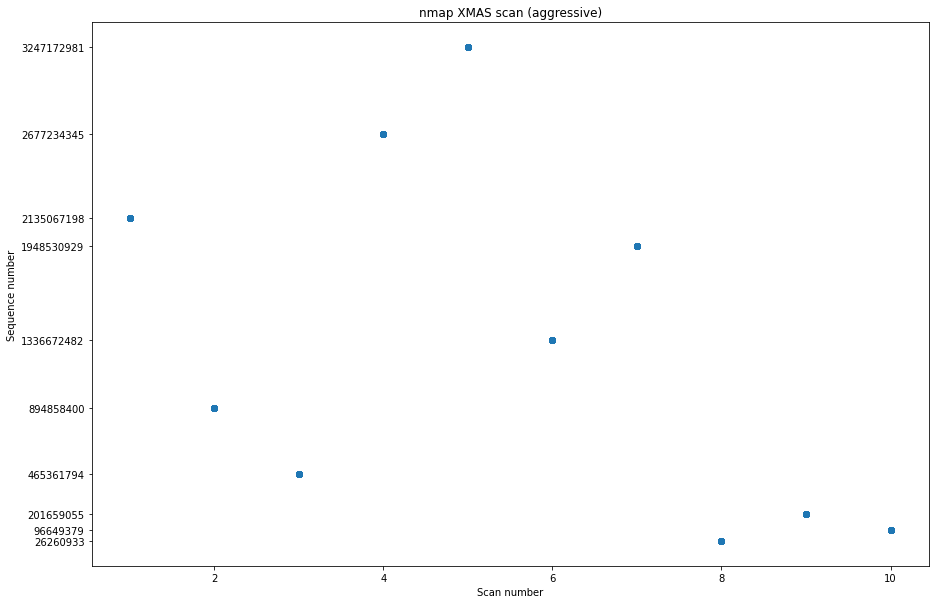

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()


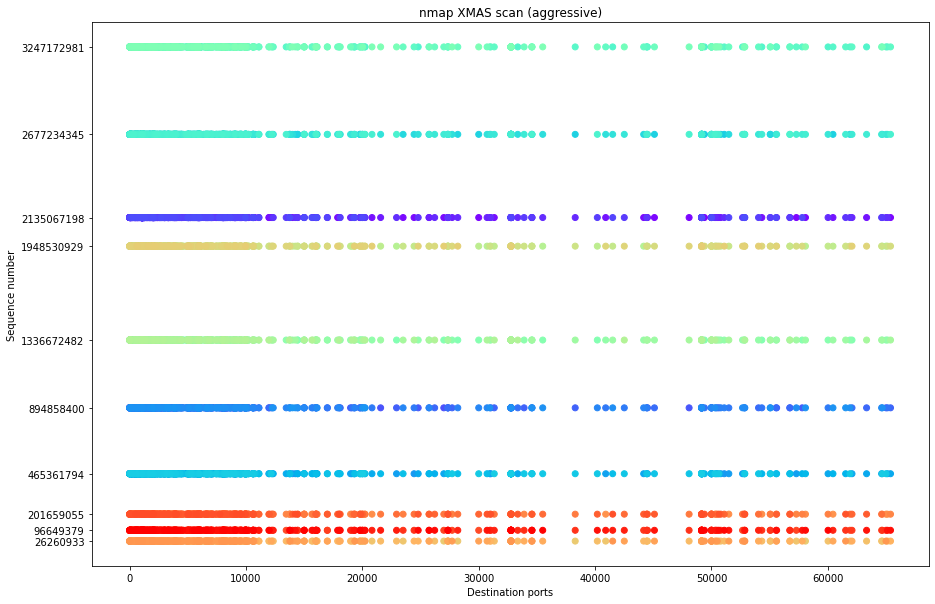

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

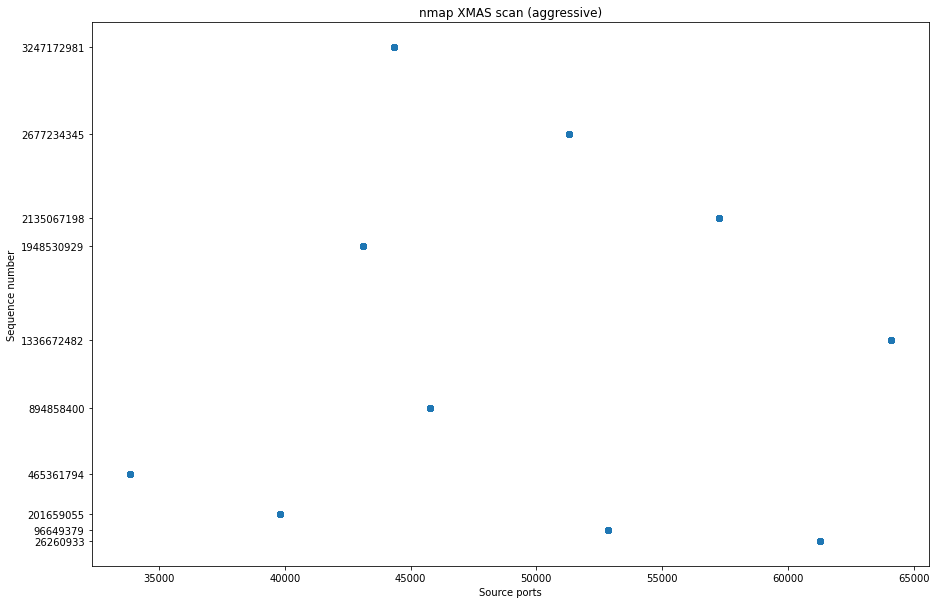

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU

Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU
Flags: FPU